## Lecture-03 Gradient Descent and Dymanic Programming

####  Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

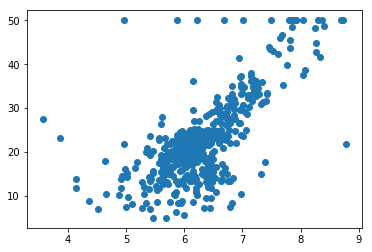

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
data = load_boston()
x,y = data['data'], data['target']
%matplotlib inline
plt.scatter(x[:,5],y)

In [15]:
print(type(x))

<class 'numpy.ndarray'>


In [2]:
def price(rm, k, b):
    '''f(x) = k*x + b'''
    return k*rm +b

In [50]:
def loss_abs(y, y_hat):
    '''Loss = |y - y_hat| '''
    l = [abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y), list(y_hat))]
    #print(l)
    return sum(l)/(len(list(y)))

In [57]:
current_k = random.random() * 100 - 50
current_b = random.random() * 100 - 50
price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm] 
current_loss_abs = loss_abs(y, price_by_k_and_b)
current_loss_squ = loss_squ(y, price_by_k_and_b)
print(current_loss_abs)
print(current_loss_squ)

302.5517050790494
92194.6097821938


In [33]:
def loss_squ(y, y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [16]:
def partial_k(x, y, y_hat):
    
    n = len(y)
    gradient = 0
    for x_i, y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += x_i
            return (-1/n)*gradient
        else:
            gradient += x_i
            return (1/n)*gradient

In [12]:
def partial_b(x, y, y_hat):
    
    n = len(y)
    
    for  y_i,y_hat_i in zip(list(y),list(y_hat)):
        if y_i >= y_hat_i:
            return (-1/n)
        else:
            return (1/n)

In [62]:
import random
trying_times = 10000
x_rm = x[:,5]

min_loss = float('inf')
current_k = random.random() * 100 - 50
current_b = random.random() * 100 - 50



learning_rate = 0.4
for i in range(trying_times):
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm] 
    
    current_loss = loss_abs(y, price_by_k_and_b)
    #current_loss = loss_squ(y, price_by_k_and_b)
    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    
    #ic(type(y))
    
    
    
    if current_loss < min_loss: #perform better
        min_loss = current_loss
        #if i %100 == 0:
            
    print('tims:{}, min_loss:{}, best_k:{}, best_b:{}'.format(i, min_loss, current_k, current_b))
        
    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    #print(k_gradient)
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    #print(b_gradient)
    current_k = current_k - k_gradient * learning_rate
    current_b = current_b - b_gradient * learning_rate
    #print(current_k)

tims:0, min_loss:111.4223414007126, best_k:-7.234516422860125, best_b:-43.42324438963399
tims:1, min_loss:111.38888569233573, best_k:-7.229318794401627, best_b:-43.4224538758
tims:2, min_loss:111.35542998395876, best_k:-7.22412116594313, best_b:-43.42166336196601
tims:3, min_loss:111.3219742755818, best_k:-7.218923537484632, best_b:-43.42087284813202
tims:4, min_loss:111.28851856720478, best_k:-7.2137259090261345, best_b:-43.42008233429803
tims:5, min_loss:111.25506285882784, best_k:-7.208528280567637, best_b:-43.41929182046404
tims:6, min_loss:111.22160715045086, best_k:-7.203330652109139, best_b:-43.41850130663005
tims:7, min_loss:111.18815144207394, best_k:-7.198133023650642, best_b:-43.41771079279606
tims:8, min_loss:111.15469573369701, best_k:-7.192935395192144, best_b:-43.41692027896207
tims:9, min_loss:111.12124002532009, best_k:-7.187737766733647, best_b:-43.416129765128076
tims:10, min_loss:111.08778431694319, best_k:-7.182540138275149, best_b:-43.415339251294085
tims:11, min_

tims:213, min_loss:104.29627551642386, best_k:-6.12742156120014, best_b:-43.25486494299396
tims:214, min_loss:104.26281980804673, best_k:-6.122223932741642, best_b:-43.25407442915997
tims:215, min_loss:104.22936409966968, best_k:-6.1170263042831445, best_b:-43.25328391532598
tims:216, min_loss:104.19590839129287, best_k:-6.111828675824647, best_b:-43.25249340149199
tims:217, min_loss:104.16245268291593, best_k:-6.106631047366149, best_b:-43.251702887658
tims:218, min_loss:104.12899697453898, best_k:-6.101433418907652, best_b:-43.25091237382401
tims:219, min_loss:104.09554126616212, best_k:-6.096235790449154, best_b:-43.25012185999002
tims:220, min_loss:104.06208555778515, best_k:-6.091038161990657, best_b:-43.249331346156026
tims:221, min_loss:104.0286298494082, best_k:-6.085840533532159, best_b:-43.248540832322035
tims:222, min_loss:103.99517414103131, best_k:-6.0806429050736615, best_b:-43.247750318488045
tims:223, min_loss:103.96171843265425, best_k:-6.075445276615164, best_b:-43.24

tims:428, min_loss:97.10329821538103, best_k:-5.009931442623159, best_b:-43.08490446868595
tims:429, min_loss:97.06984250700405, best_k:-5.004733814164662, best_b:-43.08411395485196
tims:430, min_loss:97.03638679862718, best_k:-4.999536185706164, best_b:-43.08332344101797
tims:431, min_loss:97.00293109025024, best_k:-4.994338557247667, best_b:-43.082532927183976
tims:432, min_loss:96.96947538187328, best_k:-4.989140928789169, best_b:-43.081742413349986
tims:433, min_loss:96.93601967349638, best_k:-4.9839433003306715, best_b:-43.080951899515995
tims:434, min_loss:96.90256396511937, best_k:-4.978745671872174, best_b:-43.080161385682004
tims:435, min_loss:96.86910825674235, best_k:-4.973548043413676, best_b:-43.07937087184801
tims:436, min_loss:96.83565254836552, best_k:-4.968350414955179, best_b:-43.07858035801402
tims:437, min_loss:96.80219683998844, best_k:-4.963152786496681, best_b:-43.07778984418003
tims:438, min_loss:96.76874113161153, best_k:-4.9579551580381835, best_b:-43.07699933

tims:673, min_loss:88.90664966302987, best_k:-3.736512470291229, best_b:-42.89122857935821
tims:674, min_loss:88.87319395465295, best_k:-3.731314841832731, best_b:-42.89043806552422
tims:675, min_loss:88.83973824627597, best_k:-3.726117213374233, best_b:-42.88964755169023
tims:676, min_loss:88.80628253789911, best_k:-3.720919584915735, best_b:-42.88885703785624
tims:677, min_loss:88.77282682952207, best_k:-3.715721956457237, best_b:-42.88806652402225
tims:678, min_loss:88.73937112114511, best_k:-3.7105243279987388, best_b:-42.88727601018826
tims:679, min_loss:88.70591541276819, best_k:-3.7053266995402407, best_b:-42.88648549635427
tims:680, min_loss:88.67245970439129, best_k:-3.7001290710817427, best_b:-42.88569498252028
tims:681, min_loss:88.63900399601418, best_k:-3.6949314426232447, best_b:-42.88490446868629
tims:682, min_loss:88.6055482876374, best_k:-3.6897338141647467, best_b:-42.884113954852296
tims:683, min_loss:88.57209257926033, best_k:-3.6845361857062486, best_b:-42.88332344

tims:893, min_loss:81.5463938201019, best_k:-2.593034209421663, best_b:-42.717315535880246
tims:894, min_loss:81.5129381117249, best_k:-2.587836580963165, best_b:-42.716525022046255
tims:895, min_loss:81.47948240334796, best_k:-2.582638952504667, best_b:-42.715734508212265
tims:896, min_loss:81.44602669497093, best_k:-2.577441324046169, best_b:-42.714943994378274
tims:897, min_loss:81.41257098659416, best_k:-2.572243695587671, best_b:-42.71415348054428
tims:898, min_loss:81.37911527821716, best_k:-2.567046067129173, best_b:-42.71336296671029
tims:899, min_loss:81.34565956984021, best_k:-2.561848438670675, best_b:-42.7125724528763
tims:900, min_loss:81.3122038614632, best_k:-2.5566508102121768, best_b:-42.71178193904231
tims:901, min_loss:81.27874815308631, best_k:-2.5514531817536787, best_b:-42.71099142520832
tims:902, min_loss:81.24529244470932, best_k:-2.5462555532951807, best_b:-42.71020091137433
tims:903, min_loss:81.21183673633243, best_k:-2.5410579248366827, best_b:-42.7094103975

tims:1134, min_loss:73.48356810125784, best_k:-1.3404057509236385, best_b:-42.52680170188847
tims:1135, min_loss:73.45011239288094, best_k:-1.3352081224651404, best_b:-42.52601118805448
tims:1136, min_loss:73.4166566845041, best_k:-1.3300104940066424, best_b:-42.52522067422049
tims:1137, min_loss:73.38320097612704, best_k:-1.3248128655481444, best_b:-42.5244301603865
tims:1138, min_loss:73.34974526775012, best_k:-1.3196152370896463, best_b:-42.52363964655251
tims:1139, min_loss:73.31628955937319, best_k:-1.3144176086311483, best_b:-42.52284913271852
tims:1140, min_loss:73.28283385099618, best_k:-1.3092199801726503, best_b:-42.52205861888453
tims:1141, min_loss:73.24937814261929, best_k:-1.3040223517141523, best_b:-42.52126810505054
tims:1142, min_loss:73.21592243424237, best_k:-1.2988247232556542, best_b:-42.52047759121655
tims:1143, min_loss:73.18246672586545, best_k:-1.2936270947971562, best_b:-42.51968707738256
tims:1144, min_loss:73.14901101748852, best_k:-1.2884294663386582, best_

tims:1355, min_loss:66.08985654995297, best_k:-0.19172986159557448, best_b:-42.352098144576516
tims:1356, min_loss:66.05640084157595, best_k:-0.18653223313707645, best_b:-42.351307630742525
tims:1357, min_loss:66.02294513319903, best_k:-0.18133460467857843, best_b:-42.350517116908534
tims:1358, min_loss:65.9894894248221, best_k:-0.1761369762200804, best_b:-42.349726603074544
tims:1359, min_loss:65.95603371644518, best_k:-0.17093934776158237, best_b:-42.34893608924055
tims:1360, min_loss:65.92257800806826, best_k:-0.16574171930308434, best_b:-42.34814557540656
tims:1361, min_loss:65.88912229969128, best_k:-0.16054409084458632, best_b:-42.34735506157257
tims:1362, min_loss:65.8556665913143, best_k:-0.1553464623860883, best_b:-42.34656454773858
tims:1363, min_loss:65.82221088293738, best_k:-0.15014883392759026, best_b:-42.34577403390459
tims:1364, min_loss:65.78875517456038, best_k:-0.14495120546909224, best_b:-42.3449835200706
tims:1365, min_loss:65.7552994661835, best_k:-0.1397535770105

tims:1560, min_loss:59.231436332679024, best_k:0.873783972396521, best_b:-42.19004280860841
tims:1561, min_loss:59.19798062430213, best_k:0.878981600855019, best_b:-42.18925229477442
tims:1562, min_loss:59.16452491592516, best_k:0.884179229313517, best_b:-42.18846178094043
tims:1563, min_loss:59.131069207548244, best_k:0.889376857772015, best_b:-42.18767126710644
tims:1564, min_loss:59.097613499171324, best_k:0.894574486230513, best_b:-42.18688075327245
tims:1565, min_loss:59.06415779079434, best_k:0.8997721146890111, best_b:-42.18609023943846
tims:1566, min_loss:59.03070208241741, best_k:0.9049697431475091, best_b:-42.185299725604466
tims:1567, min_loss:58.997246374040486, best_k:0.9101673716060071, best_b:-42.184509211770475
tims:1568, min_loss:58.96379066566352, best_k:0.9153650000645052, best_b:-42.183718697936484
tims:1569, min_loss:58.9303349572865, best_k:0.9205626285230032, best_b:-42.182928184102494
tims:1570, min_loss:58.896879248909585, best_k:0.9257602569815012, best_b:-42.

tims:1788, min_loss:51.603534822735455, best_k:2.0588432609340708, best_b:-42.00980565445852
tims:1789, min_loss:51.570079114358485, best_k:2.064040889392569, best_b:-42.00901514062453
tims:1790, min_loss:51.53662340598159, best_k:2.069238517851067, best_b:-42.008224626790536
tims:1791, min_loss:51.50316769760461, best_k:2.074436146309565, best_b:-42.007434112956545
tims:1792, min_loss:51.46971198922774, best_k:2.079633774768063, best_b:-42.006643599122555
tims:1793, min_loss:51.43625628085074, best_k:2.084831403226561, best_b:-42.005853085288564
tims:1794, min_loss:51.40280057247377, best_k:2.090029031685059, best_b:-42.00506257145457
tims:1795, min_loss:51.369344864096924, best_k:2.095226660143557, best_b:-42.00427205762058
tims:1796, min_loss:51.335889155719904, best_k:2.100424288602055, best_b:-42.00348154378659
tims:1797, min_loss:51.30243344734296, best_k:2.105621917060553, best_b:-42.0026910299526
tims:1798, min_loss:51.268977738966015, best_k:2.110819545519051, best_b:-42.00190

tims:2018, min_loss:43.90872189603797, best_k:3.254297806388617, best_b:-41.82798747264064
tims:2019, min_loss:43.875266187661, best_k:3.259495434847115, best_b:-41.82719695880665
tims:2020, min_loss:43.84181047928404, best_k:3.264693063305613, best_b:-41.82640644497266
tims:2021, min_loss:43.80835477090711, best_k:3.269890691764111, best_b:-41.82561593113867
tims:2022, min_loss:43.77489906253016, best_k:3.275088320222609, best_b:-41.82482541730468
tims:2023, min_loss:43.7414433541532, best_k:3.280285948681107, best_b:-41.82403490347069
tims:2024, min_loss:43.707987645776264, best_k:3.285483577139605, best_b:-41.8232443896367
tims:2025, min_loss:43.67453193739935, best_k:3.290681205598103, best_b:-41.82245387580271
tims:2026, min_loss:43.64107622902239, best_k:3.295878834056601, best_b:-41.82166336196872
tims:2027, min_loss:43.60762052064543, best_k:3.3010764625150992, best_b:-41.82087284813473
tims:2028, min_loss:43.57416481226851, best_k:3.3062740909735973, best_b:-41.820082334300736

tims:2269, min_loss:35.51133909342491, best_k:4.558902549471574, best_b:-41.62956850030896
tims:2270, min_loss:35.477883385047946, best_k:4.564100177930071, best_b:-41.62877798647497
tims:2271, min_loss:35.44442767667101, best_k:4.569297806388569, best_b:-41.62798747264098
tims:2272, min_loss:35.41097196829405, best_k:4.5744954348470666, best_b:-41.62719695880699
tims:2273, min_loss:35.3775162599171, best_k:4.579693063305564, best_b:-41.626406444973
tims:2274, min_loss:35.34406055154019, best_k:4.584890691764062, best_b:-41.62561593113901
tims:2275, min_loss:35.31060484316324, best_k:4.590088320222559, best_b:-41.62482541730502
tims:2276, min_loss:35.277149134786285, best_k:4.595285948681057, best_b:-41.62403490347103
tims:2277, min_loss:35.24369342640933, best_k:4.6004835771395545, best_b:-41.62324438963704
tims:2278, min_loss:35.21023771803238, best_k:4.605681205598052, best_b:-41.622453875803046
tims:2279, min_loss:35.17678200965545, best_k:4.61087883405655, best_b:-41.6216633619690

tims:2478, min_loss:28.519096042643817, best_k:5.645206897297569, best_b:-41.464351109004895
tims:2479, min_loss:28.48564033426689, best_k:5.650404525756066, best_b:-41.463560595170904
tims:2480, min_loss:28.45218462588993, best_k:5.655602154214564, best_b:-41.46277008133691
tims:2481, min_loss:28.418728917513008, best_k:5.660799782673061, best_b:-41.46197956750292
tims:2482, min_loss:28.385273209136056, best_k:5.665997411131559, best_b:-41.46118905366893
tims:2483, min_loss:28.35181750075911, best_k:5.6711950395900566, best_b:-41.46039853983494
tims:2484, min_loss:28.318361792382166, best_k:5.676392668048554, best_b:-41.45960802600095
tims:2485, min_loss:28.284906084005218, best_k:5.681590296507052, best_b:-41.45881751216696
tims:2486, min_loss:28.251450375628306, best_k:5.686787924965549, best_b:-41.45802699833297
tims:2487, min_loss:28.21799466725136, best_k:5.691985553424047, best_b:-41.45723648449898
tims:2488, min_loss:28.184538958874377, best_k:5.6971831818825445, best_b:-41.456

tims:2707, min_loss:20.857738824323896, best_k:6.835463814293515, best_b:-41.28332344102101
tims:2708, min_loss:20.824283115946926, best_k:6.840661442752013, best_b:-41.28253292718702
tims:2709, min_loss:20.790827407570013, best_k:6.84585907121051, best_b:-41.28174241335303
tims:2710, min_loss:20.757371699193087, best_k:6.851056699669008, best_b:-41.28095189951904
tims:2711, min_loss:20.72391599081611, best_k:6.8562543281275055, best_b:-41.28016138568505
tims:2712, min_loss:20.69046028243917, best_k:6.861451956586003, best_b:-41.27937087185106
tims:2713, min_loss:20.657004574062245, best_k:6.866649585044501, best_b:-41.27858035801707
tims:2714, min_loss:20.6235488656853, best_k:6.871847213502998, best_b:-41.277789844183076
tims:2715, min_loss:20.59009315730837, best_k:6.877044841961496, best_b:-41.276999330349085
tims:2716, min_loss:20.556637448931408, best_k:6.882242470419993, best_b:-41.276208816515094
tims:2717, min_loss:20.52318174055447, best_k:6.887440098878491, best_b:-41.275418

tims:2919, min_loss:13.877548286168638, best_k:7.937361047495003, best_b:-41.11573450821497
tims:2920, min_loss:13.845526402410126, best_k:7.9425586759535, best_b:-41.11494399438098
tims:2921, min_loss:13.813519979251696, best_k:7.947756304411998, best_b:-41.11415348054699
tims:2922, min_loss:13.781635680442179, best_k:7.9529539328704955, best_b:-41.113362966713
tims:2923, min_loss:13.74975138163263, best_k:7.958151561328993, best_b:-41.11257245287901
tims:2924, min_loss:13.71786708282309, best_k:7.963349189787491, best_b:-41.11178193904502
tims:2925, min_loss:13.685984662282658, best_k:7.968546818245988, best_b:-41.110991425211026
tims:2926, min_loss:13.654255369722236, best_k:7.973744446704486, best_b:-41.110200911377035
tims:2927, min_loss:13.622526077161812, best_k:7.978942075162983, best_b:-41.109410397543044
tims:2928, min_loss:13.590796784601395, best_k:7.984139703621481, best_b:-41.10861988370905
tims:2929, min_loss:13.559067492040981, best_k:7.9893373320799785, best_b:-41.1078

tims:3130, min_loss:7.813457082708887, best_k:9.03406065223817, best_b:-40.94893608924292
tims:3131, min_loss:7.788956459085641, best_k:9.039258280696668, best_b:-40.94814557540893
tims:3132, min_loss:7.764455835462404, best_k:9.044455909155166, best_b:-40.94735506157494
tims:3133, min_loss:7.73995521183916, best_k:9.049653537613665, best_b:-40.94656454774095
tims:3134, min_loss:7.7154545882159145, best_k:9.054851166072163, best_b:-40.94577403390696
tims:3135, min_loss:7.690978248146373, best_k:9.060048794530662, best_b:-40.94498352007297
tims:3136, min_loss:7.666719899462525, best_k:9.06524642298916, best_b:-40.944193006238976
tims:3137, min_loss:7.6424864952146905, best_k:9.070444051447659, best_b:-40.943402492404985
tims:3138, min_loss:7.618253090966846, best_k:9.075641679906157, best_b:-40.942611978570994
tims:3139, min_loss:7.594019686719009, best_k:9.080839308364656, best_b:-40.941821464737004
tims:3140, min_loss:7.56978628247117, best_k:9.086036936823154, best_b:-40.941030950903

tims:3348, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3349, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3350, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3351, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3352, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3353, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3354, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3355, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3356, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3357, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3358, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:3599, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3600, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3601, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3602, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3603, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3604, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3605, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3606, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3607, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3608, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3609, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:3833, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3834, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3835, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3836, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3837, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3838, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3839, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3840, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3841, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:3842, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:3843, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:4068, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4069, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4070, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4071, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4072, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4073, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4074, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4075, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4076, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4077, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4078, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:4303, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4304, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4305, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4306, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4307, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4308, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4309, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4310, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4311, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4312, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4313, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:4518, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4519, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4520, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4521, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4522, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4523, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4524, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4525, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4526, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4527, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4528, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:4744, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4745, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4746, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4747, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4748, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4749, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4750, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4751, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4752, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4753, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4754, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:4910, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4911, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4912, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4913, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4914, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4915, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4916, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4917, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4918, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:4919, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:4920, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:5090, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5091, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5092, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5093, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5094, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5095, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5096, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5097, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5098, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5099, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5100, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:5283, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5284, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5285, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5286, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5287, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5288, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5289, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5290, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5291, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5292, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5293, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:5482, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5483, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5484, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5485, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5486, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5487, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5488, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5489, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5490, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5491, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5492, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:5675, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5676, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5677, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5678, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5679, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5680, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5681, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5682, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5683, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5684, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5685, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:5851, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5852, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5853, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5854, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5855, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5856, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5857, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5858, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5859, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:5860, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:5861, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:6044, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6045, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6046, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6047, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6048, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6049, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6050, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6051, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6052, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6053, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6054, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:6254, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6255, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6256, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6257, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6258, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6259, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6260, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6261, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6262, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6263, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6264, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:6451, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6452, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6453, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6454, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6455, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6456, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6457, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6458, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6459, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6460, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6461, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:6673, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6674, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6675, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6676, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6677, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6678, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6679, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6680, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6681, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6682, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6683, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:6874, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6875, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6876, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6877, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6878, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6879, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6880, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6881, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6882, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6883, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6884, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:6965, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6966, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6967, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6968, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6969, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6970, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6971, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6972, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6973, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:6974, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:6975, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:7159, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7160, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7161, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7162, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7163, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7164, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7165, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7166, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7167, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7168, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7169, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:7367, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7368, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7369, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7370, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7371, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7372, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7373, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7374, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7375, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7376, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7377, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:7567, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7568, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7569, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7570, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7571, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7572, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7573, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7574, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7575, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7576, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7577, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:7781, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7782, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7783, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7784, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7785, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7786, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7787, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7788, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7789, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7790, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7791, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:7975, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7976, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7977, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7978, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7979, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7980, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7981, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7982, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7983, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:7984, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:7985, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:8128, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8129, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8130, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8131, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8132, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8133, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8134, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8135, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8136, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8137, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8138, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:8333, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8334, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8335, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8336, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8337, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8338, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8339, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8340, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8341, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8342, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8343, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:8558, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8559, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8560, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8561, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8562, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8563, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8564, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8565, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8566, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8567, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8568, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:8771, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8772, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8773, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8774, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8775, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8776, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8777, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8778, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8779, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8780, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8781, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:8990, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8991, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8992, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8993, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8994, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8995, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8996, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8997, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:8998, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:8999, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9000, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:9160, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9161, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9162, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9163, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9164, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9165, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9166, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9167, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9168, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9169, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9170, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:9342, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9343, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9344, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9345, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9346, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9347, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9348, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9349, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9350, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9351, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9352, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:9580, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9581, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9582, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9583, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9584, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9585, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9586, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9587, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9588, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9589, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9590, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238

tims:9783, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9784, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9785, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9786, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9787, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9788, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9789, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9790, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9791, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9792, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9793, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

tims:9977, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9978, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9979, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9980, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9981, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9982, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9983, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9984, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9985, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839
tims:9986, min_loss:4.706035628703218, best_k:9.855285948680928, best_b:-40.82403490347238
tims:9987, min_loss:4.706035628703218, best_k:9.860483577139426, best_b:-40.82324438963839

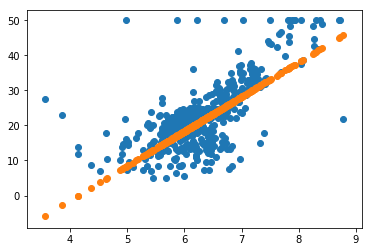

In [63]:
k = 9.86048357
b = -40.8232443896
price_by_random_k_and_b = [price(r,k, b) for r in x_rm]


plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)

## Part 3: Finish the Solution Parse Part of Edit-Distance

In [162]:
solution = {}

In [140]:
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    #print(string1,string2,candidates)
    return min_distance

In [185]:
solution = {}
edit_distance('ABC', 'B')

2

In [186]:
solution

{('A', 'B'): 'SUB A => B', ('AB', 'B'): '', ('ABC', 'B'): 'DEL C'}

In [99]:
solution[('B','A')]

'SUB B => A'

In [141]:
edit_distance('ACF', 'ABE')

2

In [142]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABE'): 'ADD E',
 ('AC', 'A'): 'DEL C',
 ('AC', 'AB'): 'SUB C => B',
 ('AC', 'ABE'): 'ADD E',
 ('ACF', 'A'): 'DEL F',
 ('ACF', 'AB'): 'DEL F',
 ('ACF', 'ABE'): 'SUB F => E'}

In [120]:
print(type(solution[('A','A')]))

<class 'str'>


In [257]:
operation = []
def parse_edit_distance(string1, string2):
    '''operation : the steps string1 needs to take to transform into string2'''
    global operation
    if not string1: return string2
    if not string2: return string1
    
    
    operation.append(solution[(string1, string2)])
    
    if len(string1) < len(string2):
        return parse_edit_distance(string1[:], string2[:-1])
    elif len(string1) > len(string2):
        return parse_edit_distance(string1[:-1], string2[:])
    else:
        return parse_edit_distance(string1[:-1], string2[:-1])

In [271]:
#test 1  len(s1) = len(s2)
s1 = 'ABCD'
s2 = 'ABEF'

solution = {}
edit_distance(s1,s2)
operation = []
parse_edit_distance(s1,s2)

''

In [272]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABE'): 'ADD E',
 ('A', 'ABEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABE'): 'ADD E',
 ('AB', 'ABEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABE'): 'SUB C => E',
 ('ABC', 'ABEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABE'): 'DEL D',
 ('ABCD', 'ABEF'): 'SUB D => F'}

In [273]:
#s1 = 'ABCD'
#s2 = 'ABEF'
operation

['SUB D => F', 'SUB C => E', '', '']

In [274]:
#test 1  len(s1) > len(s2)
s1 = '13579'
s2 = '1346'

solution = {}
edit_distance(s1,s2)
operation = []
parse_edit_distance(s1,s2)

''

In [275]:
operation

['DEL 9', 'SUB 7 => 6', 'SUB 5 => 4', '', '']

In [288]:
#test 1  len(s1) < len(s2)
s1 = '1346'
s2 = '135798'

solution = {}
edit_distance(s1,s2)
operation = []
parse_edit_distance(s1,s2)

''

In [289]:
operation

['ADD 8', 'ADD 9', 'SUB 6 => 7', 'SUB 4 => 5', '', '']

## Part 5-1: review machine learning

#### 1.Why do we use Derivative / Gredient to fit a target function?  
  
Ans:Because we can give some directions to the target function(usually the Loss function). So that the target function can converge rapidly.

#### 2.In the words 'Gredient Descent', what's the Gredient and what's the Descent?  
  
Ans: The gradient is a multi-variable generalization of the derivative.Descent means to take steps proportional to the negative of the gradient, and find the local minimum.

#### 3.What's the advantages of the 3rd gradient descent method compared to the previous methods?  
  
Ans:The 1st method don't have directions, it takes lots of resources to get the proper k and b.  
The 2nd way has directions but not always the right one.  
After all, the 3rd method, has a clear direction and move on effiently.

#### 4.Using the simple words to describe: What's the machine leanring.  
  
Ans:  automatic; data analysis

## Part 5: Answer following questions:

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?  

Ans: a.Dynamic Programming can solve complex problems which consists of overlapping subproblems.  
b.Search problem contains different nodes needed to be visited while dynamic programming contains some overlapping nodes(subproblems).  
3. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?  

Ans:In my opinion, both method are able to solve problem. The point is dynamic programming is more suitable to solve problems with clear and fewer inputs. In contrast, ML do better when dealing with big data(large inputs).
4. Can you catch up at least 3 problems which could solved by Dynamic Programming?  

Ans:1.Cutting Length 2.Edit Distance 3.Fibonacci sequence
Can you catch up at least 3 problems wich could sloved by Edit Distance?  
Ans:1.拼写联想 2.拼写检查 3.数字匹配  
5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.  

Ans: 1.Overlapping Subproblems. The problem can be divided into overlapping subproblems
2.Overlapping computing saved in a table. We can solve subproblems and stored it in a table.
3.Parsing Solution. Solution is the table we need to look up so that the problem is solved.
6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)  

Ans:1.No general formation of Dynamic Program is available; every problem has to be solving in its own way.
2.Dividing problem in sub problem and storing inter mediate results consumes memory.  
Quoted from Quora [https://www.quora.com/What-are-the-advantages-and-disadvantages-of-dynamic-programming]

## Part 6 Preparation of Project-01
Using python Flask or Bottle to finish your first simple web app:

https://bottlepy.org/

Learn what's the SQL, and try some simple SQL operations:

https://www.w3schools.com/sql/sql_intro.asp

Learn what's the HTML ( ONLY need to know the basic things)

https://getbootstrap.com/; https://www.w3schools.com/html/